<a href="https://colab.research.google.com/github/DavidUrbaez/AI_Course/blob/main/content/LAB%2005.02%20-%20MODEL%20EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [21]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


In [55]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as durbaezl@unal.edu.co... please wait
using course session ai4eng.v1::open
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [22]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 48, 41, 26, 60],
       [ 2, 75, 37, 77, 15],
       [ 3, 59, 37, 27, 14],
       [ 4,  7, 25, 66, 26],
       [ 5, 83, 23, 39, 66],
       [ 6, 79, 21, 50, 79],
       [ 7,  9, 22, 18, 62],
       [ 8, 46, 87, 20, 35],
       [ 9, 18, 10, 40,  8],
       [10, 38, 64, 58, 94],
       [11, 86, 45, 82, 68],
       [12, 68, 64, 24, 93],
       [13, 86, 26, 40, 70],
       [14, 58, 25, 37, 90],
       [15, 99, 35, 76, 88],
       [16, 83, 34, 73, 33],
       [17, 99,  9, 90, 79],
       [18, 97, 58, 38, 95],
       [19, 73, 44, 57, 93]])

In [23]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 75, 37, 77, 15],
       [ 4,  7, 25, 66, 26],
       [ 5, 83, 23, 39, 66]])

In [24]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [48, 26],
       [75, 77],
       [59, 27],
       [ 7, 66],
       [83, 39],
       [79, 50],
       [ 9, 18],
       [46, 20],
       [18, 40],
       [38, 58],
       [86, 82],
       [68, 24],
       [86, 40],
       [58, 37],
       [99, 76],
       [83, 73],
       [99, 90],
       [97, 38],
       [73, 57]])

In [25]:
x[ridxs][:, cidxs]

array([[75, 77],
       [ 7, 66],
       [83, 39]])

and the dimensions of the array are accessible through `len` and `shape`

In [26]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [27]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 48, 41, 26, 60],
       [ 2, 75, 37, 77, 15]])

In [28]:
x[3:]

array([[ 3, 59, 37, 27, 14],
       [ 4,  7, 25, 66, 26],
       [ 5, 83, 23, 39, 66],
       [ 6, 79, 21, 50, 79],
       [ 7,  9, 22, 18, 62],
       [ 8, 46, 87, 20, 35],
       [ 9, 18, 10, 40,  8],
       [10, 38, 64, 58, 94],
       [11, 86, 45, 82, 68],
       [12, 68, 64, 24, 93],
       [13, 86, 26, 40, 70],
       [14, 58, 25, 37, 90],
       [15, 99, 35, 76, 88],
       [16, 83, 34, 73, 33],
       [17, 99,  9, 90, 79],
       [18, 97, 58, 38, 95],
       [19, 73, 44, 57, 93]])

we can do the same thing with vectors

In [29]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [30]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [16]:
np.random.permutation(v)

array([103, 101, 104, 116, 117, 102, 118, 106, 111, 105, 113, 107, 109,
       119, 115, 110, 114, 108, 112, 100])

or the first natural numbers

In [31]:
p = np.random.permutation(20)
p

array([ 4,  8,  5, 12,  6, 15,  2, 16, 19, 10, 11,  1, 13, 18,  0,  9, 14,
        7,  3, 17])

how do you interpret this?

In [32]:
v[p[5:]]

array([115, 102, 116, 119, 110, 111, 101, 113, 118, 100, 109, 114, 107,
       103, 117])

In [33]:
x[p[:5]]

array([[ 4,  7, 25, 66, 26],
       [ 8, 46, 87, 20, 35],
       [ 5, 83, 23, 39, 66],
       [12, 68, 64, 24, 93],
       [ 6, 79, 21, 50, 79]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [34]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [48]:
p=np.random.permutation(len(XX))
n1=int(len(XX) * 0.7)
p[:n1],p[n1:],p,n1

(array([15, 10, 18,  9, 11, 14,  6,  2,  5,  7, 13,  0, 16,  3]),
 array([12,  1, 19,  8, 17,  4]),
 array([15, 10, 18,  9, 11, 14,  6,  2,  5,  7, 13,  0, 16,  3, 12,  1, 19,
         8, 17,  4]),
 14)

In [49]:
def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    permutation = np.random.permutation(len(X))
    n1_elements = int(len(X) * pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [50]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 36 41 89 27 27 92 58]
 [ 2 96 86 28  3 62 72 67]
 [ 3 57 37 31 14 87 21  5]
 [ 4 50 35  9 18 74 23 97]
 [ 5 58 16 16 57 78 45 14]
 [ 6 73 14 38  9 34 58 61]
 [ 7 90 91 53 43 62 70 44]
 [ 8 25 25 22 65 51 22 32]
 [ 9 40 39 26 42 84 45 27]
 [10 82  6 93 70 22 99 55]
 [11 16 85 59  6 81  0 92]
 [12 85 63 35 69 73 25 52]
 [13  1 33 73 84 25  2 75]
 [14 36 16 95 57 57 54  1]
 [15 84 35 45 89 45 77 22]
 [16 49 56 74 71  8 52 66]
 [17 80 40 86 35 73 59 63]
 [18 43 36 49 18 46 48  0]
 [19 83 84 27 40  3 46 35]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [51]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [52]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6673, 6673, 2190, 2190)

In [53]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[ 7 90 91 53 43 62 70 44]
 [19 83 84 27 40  3 46 35]
 [18 43 36 49 18 46 48  0]
 [ 1 36 41 89 27 27 92 58]
 [10 82  6 93 70 22 99 55]
 [ 0  1  2  3  4  5  6  7]
 [ 6 73 14 38  9 34 58 61]
 [17 80 40 86 35 73 59 63]
 [16 49 56 74 71  8 52 66]
 [12 85 63 35 69 73 25 52]
 [ 3 57 37 31 14 87 21  5]
 [15 84 35 45 89 45 77 22]
 [ 4 50 35  9 18 74 23 97]
 [14 36 16 95 57 57 54  1]] 
--
[[11 16 85 59  6 81  0 92]
 [13  1 33 73 84 25  2 75]
 [ 5 58 16 16 57 78 45 14]
 [ 2 96 86 28  3 62 72 67]
 [ 8 25 25 22 65 51 22 32]
 [ 9 40 39 26 42 84 45 27]] 
--
[107 119 118 101 110 100 106 117 116 112 103 115 104 114] 
--
[111 113 105 102 108 109] 
--


In [54]:
Xts

array([[11, 16, 85, 59,  6, 81,  0, 92],
       [13,  1, 33, 73, 84, 25,  2, 75],
       [ 5, 58, 16, 16, 57, 78, 45, 14],
       [ 2, 96, 86, 28,  3, 62, 72, 67],
       [ 8, 25, 25, 22, 65, 51, 22, 32],
       [ 9, 40, 39, 26, 42, 84, 45, 27]])

**submit your code**

In [56]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [57]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [58]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

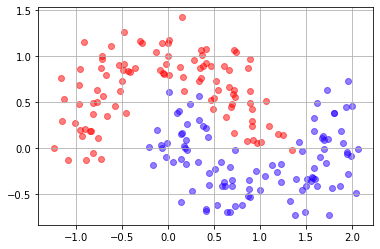

In [59]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.52145, 0.47855)

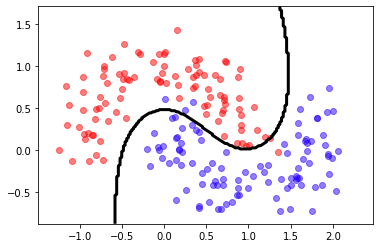

In [60]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [61]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0])

In [74]:
X=np.ones((21,2))
X[:len(X)//2].shape,X.shape

((10, 2), (21, 2))

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [80]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    
    X_train=X[:len(X)//2]
    X_test=X[len(X)//2:]

    y_train=y[:len(X)//2]
    y_test=y[len(X)//2:]

    estimator.fit(X_train,y_train)


    predictions = estimator.predict(X_test)
    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [81]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [82]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [83]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [84]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[3 1 1 1 8 4 7 3 6 4 0 7 1 8 2]


In [85]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True  True  True False  True False  True False  True  True False
  True False  True]


and how we can select elements of a vector using a boolean vector of the same length

In [86]:
y[y_less_than_5]

array([3, 1, 1, 1, 4, 3, 4, 0, 1, 2])

In [87]:
y[y<5]

array([3, 1, 1, 1, 4, 3, 4, 0, 1, 2])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [88]:
v = np.random.randint(20, size=15)
v

array([ 8,  4, 14, 17, 18,  5,  2,  2, 15,  9, 18, 16, 13,  3, 14])

In [89]:
v[y<5]

array([ 8,  4, 14, 17,  5,  2,  9, 18, 13, 14])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [90]:
def select_per_class(X, y):
    X1 = X[y==0]
    X2 = X[y==1]
    return X1, X2

check manually your code

In [91]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [92]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [93]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [94]:
def accuracy(y_true, y_pred):
    result = np.mean(y_true==y_pred)
    return result

In [95]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [96]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [97]:

def split_fit_predict(estimator, X, y, train_pct):
    
    def split_data(X, y, pct):
        
        assert len(X)==len(y), "X and y must have the same length"
        assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
        
        permutation = np.random.permutation(len(X))
        n1_elements = int(len(X) * pct)
        permutation_partition_1 = permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]
        X1 = X[permutation_partition_1]
        X2 = X[permutation_partition_2]
        y1 = y[permutation_partition_1]
        y2 = y[permutation_partition_2]
        return X1, X2, y1, y2
    
    def accuracy(y_true, y_pred):
      result = np.mean(y_true==y_pred)
      return result

    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)
    estimator.fit(Xtr,ytr)
    preds_ts = estimator.predict(Xts)
    return estimator, Xts, yts, accuracy(yts, preds_ts)
        
        

In [99]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), array([[ 0.75820903, -0.57806689],
        [-0.70489416,  0.16266143],
        [-1.0580381 ,  0.54576939],
        [ 1.69055763, -0.00873417],
        [ 0.17588336,  0.44836197],
        [-0.74847177,  0.58972416],
        [ 0.66423342,  1.06748195],
        [ 0.37488131,  0.82886209],
        [ 0.32187424,  0.02178656],
        [ 2.17611101,  0.1112902 ]]), array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1]), 0.9)

**submit your code**

In [100]:
student.submit_task(globals(), task_id="task_05");
